In [1]:
import math
import sys
import operator
import networkx as nx
#import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance
import scipy.signal
import skimage
import skimage.io
from skimage.segmentation import slic
from skimage.util import img_as_float
from scipy.optimize import minimize

import pdb

In [2]:
def get_saliency_ft(img_path):

# Saliency map calculation based on:

  img = skimage.io.imread(img_path)

  img_rgb = img_as_float(img)

  img_lab = skimage.color.rgb2lab(img_rgb) 

  mean_val = np.mean(img_lab,axis=(0,1))
  kernel_h = (1.0/16.0) * np.array([[1,4,6,4,1]])
 #kernel_h = (1.0/4.0) * np.array([[1,2,1]])
  kernel_w = kernel_h.transpose()

  blurred_l = scipy.signal.convolve2d(img_lab[:,:,0],kernel_h,mode='same')
  blurred_a = scipy.signal.convolve2d(img_lab[:,:,1],kernel_h,mode='same')
  blurred_b = scipy.signal.convolve2d(img_lab[:,:,2],kernel_h,mode='same')

  blurred_l = scipy.signal.convolve2d(blurred_l,kernel_w,mode='same')
  blurred_a = scipy.signal.convolve2d(blurred_a,kernel_w,mode='same')
  blurred_b = scipy.signal.convolve2d(blurred_b,kernel_w,mode='same')

  im_blurred = np.dstack([blurred_l,blurred_a,blurred_b])

  sal = np.linalg.norm(mean_val - im_blurred,axis = 2)
  #l = img_lab[:,:,0]
  #a = img_lab[:,:,1]
  #b = img_lab[:,:,2]
  #lm=np.mean(l) 
  #am=np.mean(a) 
  #bm=np.mean(b) 
  #sm = np.square(l-lm) + np.square(a-am) + np.square(b-bm)
  sal = np.linalg.norm(mean_val - img_lab,axis = 2)
  sal_max = np.max(sal)
  sal_min = np.min(sal)
  range = sal_max - sal_min
  if range==0:
    range = 1
  sal = 255 * ((sal - sal_min) / range)
  return sal




In [3]:
def binarise_saliency_map(saliency_map):
 
  adaptive_threshold = 2.0 * saliency_map.mean()
  return (saliency_map > adaptive_threshold)

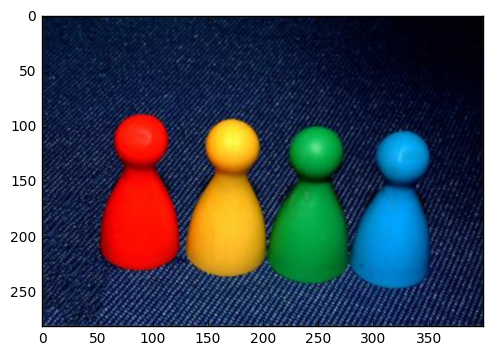

In [4]:
import cv2
from cv2.cv import *
filename = '/home/super/Downloads/0_9_9990.jpg'

# get the saliency maps using the 3 implemented methods
ft = get_saliency_ft(filename).astype('uint8')
# often, it is desirable to have a binary saliency map
binary_sal = binarise_saliency_map(ft)

srcBGR = cv2.imread(filename)

img = cv2.cvtColor(srcBGR, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#cv2.imshow('img',img)
#cv2.imshow('ft',ft)

#openCV cannot display numpy type 0, so convert to uint8 and scale
#cv2.imshow('binary',255 * binary_sal.astype('uint8'))



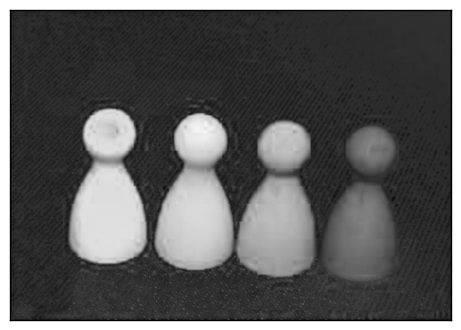

73.678274021352308

In [5]:
#trb = skimage.color.lab2rgb(ft) 
plt.imshow(ft, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

ft_mean=ft.mean()
ft_mean

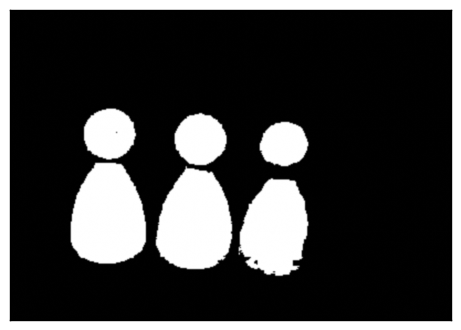

In [6]:
plt.imshow(binary_sal, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()




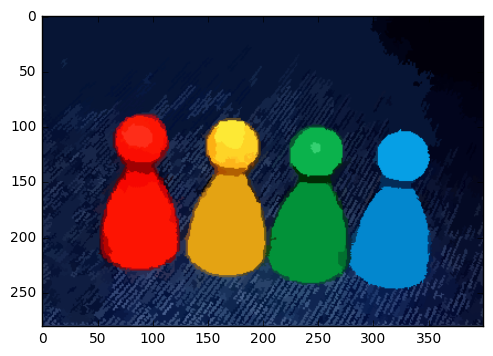

In [7]:
import cv2
import pymeanshift as pms


(segmented_image, labels_image, number_regions) = pms.segment(img, spatial_radius=7, 
                                                              range_radius=10, min_density=20)

plt.imshow(segmented_image)
plt.show()

In [8]:
labels_image.max()

871

In [9]:

segmented_image.max()
x,y,z=img.shape
bin_img=np.zeros((x,y,z))
bin_img.shape

(281, 400, 3)

In [10]:
for k in range(labels_image.max()+1):
  #ft_play=np.copy(ft)  
  ft_seg=np.copy(segmented_image)
  ft_seg[np.where(labels_image!=k)]=0
  ft_seg[np.where(ft_seg!=0)]=1
  #zp=ft_seg.nonzero()
  #unzipped = zip(*zp)
  #divi=len(unzipped)
  seg_orig=np.multiply(ft_seg[:,:,0],ft)
  seg_mean=np.sum(seg_orig)/np.count_nonzero(seg_orig)
  if seg_mean>2*ft_mean:
    bin_img[np.where(ft_seg!=0)]=1
    
  

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


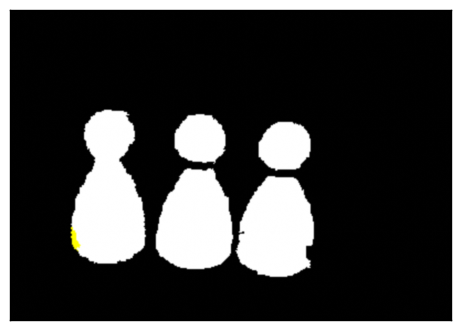

In [11]:
plt.imshow(bin_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [12]:
ft_seg=np.copy(segmented_image)
ft_seg[np.where(labels_image!=34)]=0
ft_seg[np.where(ft_seg!=0)]=1
#zp=ft_seg.nonzero()
#unzipped = zip(*zp)
#divi=len(unzipped)
seg_orig=np.multiply(ft_seg[:,:,0],ft)
seg_mean=np.sum(seg_orig)/np.count_nonzero(seg_orig)
if seg_mean>2*ft_mean:
  bin_img[np.where(ft_seg!=0)]=1

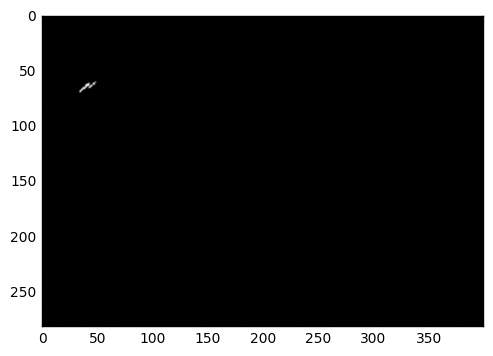

In [13]:
plt.imshow(seg_orig, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [38]:

img = skimage.io.imread(filename)

img_rgb = img_as_float(img)

img_lab = skimage.color.rgb2lab(img_rgb) 

mean_val = np.mean(img_lab,axis=(0,1))
kernel_h = (1.0/16.0) * np.array([[1,4,6,4,1]])
#kernel_h = (1.0/4.0) * np.array([[1,2,1]])
kernel_w = kernel_h.transpose()

blurred_l = scipy.signal.convolve2d(img_lab[:,:,0],kernel_h,mode='same')
blurred_a = scipy.signal.convolve2d(img_lab[:,:,1],kernel_h,mode='same')
blurred_b = scipy.signal.convolve2d(img_lab[:,:,2],kernel_h,mode='same')

blurred_l2 = scipy.signal.convolve2d(blurred_l,kernel_w,mode='same')
blurred_a2 = scipy.signal.convolve2d(blurred_a,kernel_w,mode='same')
blurred_b2 = scipy.signal.convolve2d(blurred_b,kernel_w,mode='same')

im_blurred = np.dstack([blurred_l2,blurred_a2,blurred_b2])

sal = np.linalg.norm(mean_val - im_blurred,axis = 2)
  
  #sal = np.linalg.norm(mean_val - img_lab,axis = 2)
sal_max = np.max(sal)
sal_min = np.min(sal)
sal = 255 * ((sal - sal_min) / (sal_max - sal_min))
sal=sal.astype(int)

In [39]:
sal.min()

0

In [40]:
sal

array([[32, 29, 29, ..., 34, 33, 36],
       [29, 28, 30, ..., 37, 34, 34],
       [28, 29, 34, ..., 45, 39, 36],
       ..., 
       [27, 34, 34, ..., 42, 37, 31],
       [26, 29, 30, ..., 36, 30, 27],
       [26, 20, 17, ..., 30, 25, 26]])

sal_max = np.max(sal)
sal_min = np.min(sal)
sal = 255 * ((sal - sal_min) / (sal_max - sal_min))

In [41]:

image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    #mean of each channel
means = []
for c in range(image.shape[2]):
    means.append(image[:, :, c].mean())
means = np.asarray(means)

image = cv2.medianBlur(image, 3)
dist = (image - means) ** 2
print("mean color is %s" % means)
salmap = np.zeros((dist.shape[0], dist.shape[1]))
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        salmap[i][j] = np.sqrt(dist[i][j].sum())
    """
    Makes the min max normalization over a numpy vector
    $$ v_i = (v_i - min(v)) / max(v)
    """
salmap = salmap - (salmap.min())
salmap = salmap / (salmap.max())





mean color is [  59.65266014  135.07798932  119.955     ]


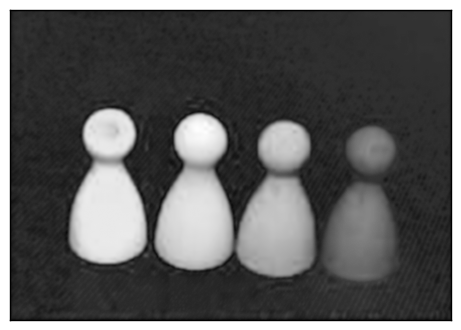

array([32, 29, 28, 25, 24, 27, 31, 32, 31, 30, 31, 33, 32, 31, 29, 29, 29,
       30, 29, 28, 28, 30, 32, 32, 31, 29, 28, 28, 29, 30, 30, 29, 29, 31,
       33, 31, 28, 28, 30, 31, 30, 30, 30, 31, 29, 28, 29, 30, 27, 23, 23,
       25, 27, 27, 29, 29, 27, 26, 27, 29, 28, 28, 28, 29, 29, 28, 28, 28,
       28, 25, 25, 28, 30, 27, 24, 26, 30, 31, 29, 26, 25, 26, 27, 29, 30,
       29, 26, 25, 27, 28, 26, 21, 20, 24, 27, 26, 24, 24, 26, 27, 26, 27,
       28, 30, 29, 27, 27, 29, 30, 31, 31, 30, 30, 29, 26, 22, 22, 27, 29,
       25, 19, 19, 25, 29, 27, 24, 25, 28, 29, 26, 20, 17, 19, 24, 24, 23,
       23, 25, 26, 25, 23, 25, 27, 27, 25, 23, 22, 24, 26, 25, 24, 23, 23,
       22, 18, 17, 17, 19, 24, 30, 32, 30, 29, 30, 29, 24, 20, 22, 27, 31,
       32, 30, 25, 17, 14, 17, 22, 26, 26, 23, 22, 25, 28, 29, 29, 26, 21,
       16, 16, 20, 26, 27, 28, 28, 28, 26, 24, 23, 23, 21, 19, 20, 25, 27,
       25, 23, 23, 26, 29, 29, 26, 23, 19, 20, 24, 27, 27, 27, 28, 27, 25,
       25, 25, 25, 26, 22

In [42]:
plt.imshow(sal, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

sal[:,0]

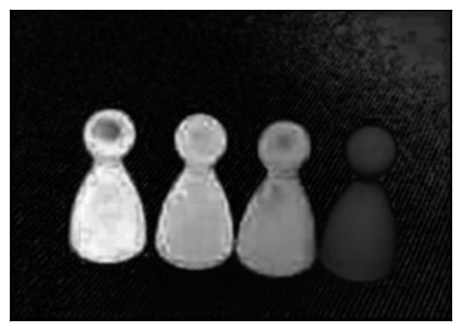

255

In [43]:
sal

img2 = skimage.io.imread('/home/super/Downloads/edit_9_9990.jpg')
plt.imshow(img2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img2.max()

In [26]:
for k in range(labels_image.max()+1):
  #ft_play=np.copy(ft)  
  ft_seg=np.copy(segmented_image)
  ft_seg[np.where(labels_image!=k)]=0
  zp=ft_seg.nonzero()
  unzipped = zip(*zp)
  divi=len(unzipped)
  seg_mean=ft_seg.sum()/divi
  if seg_mean>2*salmapmean:
    bin_img[np.where(ft_seg!=0)]=1
    

NameError: name 'salmapmean' is not defined

In [ ]:
plt.imshow(bin_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
a=np.ones((10,10,3))


plt.imshow(a, cmap = 'gray', interpolation = 'bicubic')
plt.show()


In [ ]:
a[:,:,0]=[1,2,3,4,0,6,7,8,9,255]
a[:,:,1]=[1,2,3,4,0,6,7,8,9,255]
a[:,:,2]=[1,2,3,4,0,6,7,8,9,255]


In [ ]:
plt.hist(ft.flatten(), 256, range=(0.0,1.0), fc='k', ec='k')
plt.show()

In [ ]:
np.min(salmap)

In [89]:

Cimg = skimage.io.imread('/home/super/Downloads/0_2_2276.jpg')
x,y,z=np.shape(Cimg)
R = Cimg[:,:,0]/255.0
G = Cimg[:,:,1]/255.0
B = Cimg[:,:,2]/255.0

r=np.zeros((x,y))
g=np.zeros((x,y))
b=np.zeros((x,y))

X=np.zeros((x,y))
Y=np.zeros((x,y))
Z=np.zeros((x,y))

xr=np.zeros((x,y))
yr=np.zeros((x,y))
zr=np.zeros((x,y))

fx=np.zeros((x,y))
fy=np.zeros((x,y))
fz=np.zeros((x,y))

lvec=np.zeros((x,y))
avec=np.zeros((x,y))
bvec=np.zeros((x,y))


for i in range(x):
  for j in range(y):
    if R[i,j] <= 0.04045: r[i,j] = R[i,j]/12.92;
    else: r[i,j] = pow((R[i,j]+0.055)/1.055,2.4)
    if G[i,j] <= 0.04045: g[i,j] = G[i,j]/12.92;
    else: g[i,j] = pow((G[i,j]+0.055)/1.055,2.4);
    if B[i,j] <= 0.04045: b[i,j] = B[i,j]/12.92;
    else: b[i,j] = pow((B[i,j]+0.055)/1.055,2.4);

    X[i,j] = r[i,j]*0.4124564 + g[i,j]*0.3575761 + b[i,j]*0.1804375;
    Y[i,j] = r[i,j]*0.2126729 + g[i,j]*0.7151522 + b[i,j]*0.0721750;
    Z[i,j] = r[i,j]*0.0193339 + g[i,j]*0.1191920 + b[i,j]*0.9503041;
##------------------------
## XYZ to LAB conversion
##------------------------



    epsilon = 0.008856 #/actual CIE standard
    kappa   = 903.3 #//actual CIE standard

    Xr = 0.950456 #reference white
    Yr = 1.0 #reference white
    Zr = 1.088754 #reference white

    xr[i,j] = X[i,j]/Xr;
    yr[i,j] = Y[i,j]/Yr;
    zr[i,j] = Z[i,j]/Zr;


    if xr[i,j] > epsilon: fx[i,j] = pow(xr[i,j], 1.0/3.0);
    else: fx[i,j] = (kappa*xr[i,j] + 16.0)/116.0;
    if yr[i,j] > epsilon: fy[i,j] = pow(yr[i,j], 1.0/3.0);
    else: fy[i,j] = (kappa*yr[i,j] + 16.0)/116.0;
    if zr[i,j] > epsilon: fz[i,j] = pow(zr[i,j], 1.0/3.0);
    else: fz[i,j] = (kappa*zr[i,j] + 16.0)/116.0;

    lvec[i,j] = 116.0*fy[i,j]-16.0;
    avec[i,j] = 500.0*(fx[i,j]-fy[i,j]);
    bvec[i,j] = 200.0*(fy[i,j]-fz[i,j]);



In [92]:
bvec

array([[-47.81404736, -48.03558247, -48.18538248, ..., -45.79505575,
        -45.75815188, -44.19135898],
       [-47.99839332, -48.22308916, -48.37491324, ..., -45.90642061,
        -45.83206902, -44.29765537],
       [-48.11027538, -48.33680983, -48.45140749, ..., -45.94375719,
        -45.86919092, -44.29765537],
       ..., 
       [ 24.99286298,  24.81441588,  25.67394062, ...,  27.05061689,
         26.98721863,  26.83281628],
       [ 24.72442787,  24.36120924,  25.17368719, ...,  27.7451896 ,
         28.54295043,  28.15385922],
       [ 25.38687246,  25.01808913,  25.30013716, ...,  26.67643533,
         28.11614797,  26.37875786]])

In [52]:

img = skimage.io.imread(filename)

img_rgb = img_as_float(img)

img_lab = skimage.color.rgb2lab(img_rgb) 

In [66]:
np.allclose(img_lab[:,:,2],bvec,atol=0.01)

True

In [93]:

avgl= np.mean(lvec)
avga= np.mean(avec)
avgb= np.mean(bvec)

kernel_h = (1.0/16.0) * np.array([[1,4,6,4,1]])
#kernel_h = (1.0/4.0) * np.array([[1,2,1]])
kernel_w = kernel_h.transpose()

blurred_l = scipy.signal.convolve2d(lvec,kernel_h,mode='same')
blurred_a = scipy.signal.convolve2d(avec,kernel_h,mode='same')
blurred_b = scipy.signal.convolve2d(bvec,kernel_h,mode='same')
blurred_l = scipy.signal.convolve2d(blurred_l,kernel_w,mode='same')
blurred_a = scipy.signal.convolve2d(blurred_a,kernel_w,mode='same')
blurred_b = scipy.signal.convolve2d(blurred_b,kernel_w,mode='same')

im_blurred = np.dstack([blurred_l,blurred_a,blurred_b])


sal=np.square(blurred_l-avgl) + np.square(blurred_a-avga) + np.square(blurred_b-avgb)

sal_max = np.max(sal)
sal_min = np.min(sal)
sal = 255 * ((sal - sal_min) / (sal_max - sal_min))
sal=sal.astype(int)

sal

array([[115,  99, 100, ...,  96,  96, 115],
       [ 99, 109, 118, ..., 107,  99,  94],
       [ 99, 117, 129, ..., 116, 105,  92],
       ..., 
       [ 28,  33,  38, ...,  46,  44,  58],
       [ 33,  28,  33, ...,  46,  50,  73],
       [ 67,  36,  34, ...,  60,  73, 109]])

In [73]:
mean_val

array([ 23.40243401,   7.01927664,  -8.05740477])

In [82]:
img = skimage.io.imread(filename)

img_rgb = img_as_float(img)

img_lab = skimage.color.rgb2lab(img_rgb) 

avgl,avga,avgb = np.mean(img_lab,axis=(0,1))
kernel_h = (1.0/16.0) * np.array([[1,4,6,4,1]])
#kernel_h = (1.0/4.0) * np.array([[1,2,1]])
kernel_w = kernel_h.transpose()

blurred_l = scipy.signal.convolve2d(img_lab[:,:,0],kernel_h,mode='same')
blurred_a = scipy.signal.convolve2d(img_lab[:,:,1],kernel_h,mode='same')
blurred_b = scipy.signal.convolve2d(img_lab[:,:,2],kernel_h,mode='same')

blurred_l2 = scipy.signal.convolve2d(blurred_l,kernel_w,mode='same')
blurred_a2 = scipy.signal.convolve2d(blurred_a,kernel_w,mode='same')
blurred_b2 = scipy.signal.convolve2d(blurred_b,kernel_w,mode='same')

im_blurred = np.dstack([blurred_l2,blurred_a2,blurred_b2])

#sal = np.linalg.norm(mean_val - im_blurred,axis = 2)
sal=np.square(blurred_l2-avgl) + np.square(blurred_a2-avga) + np.square(blurred_b2-avgb)
  
  #sal = np.linalg.norm(mean_val - img_lab,axis = 2)
sal_max = np.max(sal)
sal_min = np.min(sal)
sal = 255 * ((sal - sal_min) / (sal_max - sal_min))
sal=sal.astype(int)

In [88]:
sal[:21,:21,]

array([[ 4,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,  4,  4,
         3,  3,  3,  3],
       [ 3,  3,  4,  4,  4,  4,  5,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,
         4,  5,  5,  4],
       [ 3,  3,  5,  5,  6,  6,  7,  8,  8,  8,  8,  7,  6,  6,  6,  6,  6,
         6,  6,  6,  6],
       [ 2,  3,  5,  7,  7,  8,  8,  9,  9,  9,  8,  8,  7,  6,  6,  6,  6,
         7,  7,  7,  7],
       [ 2,  3,  5,  7,  8,  8,  8,  9,  8,  8,  8,  8,  7,  6,  5,  6,  7,
         7,  7,  7,  7],
       [ 3,  3,  5,  7,  8,  8,  8,  8,  8,  8,  8,  8,  7,  6,  5,  6,  7,
         8,  7,  7,  8],
       [ 4,  4,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  7,  7,  6,  7,  8,
         8,  8,  8,  9],
       [ 4,  4,  5,  6,  7,  6,  6,  7,  8,  9,  9,  8,  8,  8,  8,  8,  8,
         9,  9,  9,  9],
       [ 4,  4,  6,  6,  6,  6,  7,  7,  8,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  8,  8],
       [ 4,  5,  6,  6,  7,  7,  7,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,

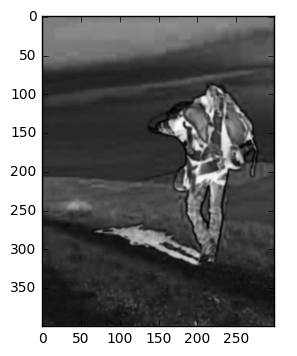

In [94]:
plt.imshow(sal, cmap = 'gray', interpolation = 'bicubic')
plt.show()